# Travel insurance 

# Setting up Libraries

In [68]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Data ingestion

Source: [Travel insurance predictions](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)

Upload and clean dataset. It was checked from the source the data was clean.

In [2]:
data = pd.read_csv("TravelInsurancePrediction.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [4]:
data.shape

(1987, 10)

# Data preparation 

In [5]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
data['Employment Type'] = data['Employment Type'].map({'Government Sector': 2, 
                                                        'Private Sector/Self Employed': 1})
transformed_data = pd.get_dummies(data['Employment Type'], prefix='emp_type')
data = pd.concat([data,transformed_data],axis=1)
data = data.drop(['Employment Type'], axis = 1)
data.columns

Index(['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance', 'emp_type_1', 'emp_type_2'],
      dtype='object')

In [7]:
data['GraduateOrNot'] = data['GraduateOrNot'].map({'Yes': 1, 
                                                   'No': 0})
transformed_data = pd.get_dummies(data['GraduateOrNot'], prefix='grad_status')
data = pd.concat([data,transformed_data],axis=1)
data = data.drop(['GraduateOrNot'], axis = 1)
data.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance', 'emp_type_1',
       'emp_type_2', 'grad_status_0', 'grad_status_1'],
      dtype='object')

In [8]:
data['FrequentFlyer'] = data['FrequentFlyer'].map({'Yes': 1, 
                                                   'No': 0})
transformed_data = pd.get_dummies(data['FrequentFlyer'], prefix='freq_flyer')
data = pd.concat([data,transformed_data],axis=1)
data = data.drop(['FrequentFlyer'], axis = 1)
data.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'EverTravelledAbroad', 'TravelInsurance', 'emp_type_1', 'emp_type_2',
       'grad_status_0', 'grad_status_1', 'freq_flyer_0', 'freq_flyer_1'],
      dtype='object')

In [9]:
data['EverTravelledAbroad'] = data['EverTravelledAbroad'].map({'Yes': 1, 
                                                   'No': 0})
transformed_data = pd.get_dummies(data['EverTravelledAbroad'], prefix='trav_abroad')
data = pd.concat([data,transformed_data],axis=1)
data = data.drop(['EverTravelledAbroad'], axis = 1)
data.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance', 'emp_type_1', 'emp_type_2', 'grad_status_0',
       'grad_status_1', 'freq_flyer_0', 'freq_flyer_1', 'trav_abroad_0',
       'trav_abroad_1'],
      dtype='object')

Reduce complexity of annual income using a z-score normalisation

In [10]:
mu  = np.mean(data['AnnualIncome'])
std = np.std(data['AnnualIncome'])
data['AnnualIncome'] =(data['AnnualIncome'] - mu)/std
                                                              

Prepare the data for analysis. Split the datasets into training, valid and test datasets

,TravelInsurance_0,TravelInsurance_1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [12]:
y = data.TravelInsurance.values
X = data.drop(["TravelInsurance"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 42)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, 
                                                    test_size = 0.50, 
                                                    random_state = 42)




In [13]:
X_train.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'emp_type_1',
       'emp_type_2', 'grad_status_0', 'grad_status_1', 'freq_flyer_0',
       'freq_flyer_1', 'trav_abroad_0', 'trav_abroad_1'],
      dtype='object')

In [14]:
X_train.shape

(1192, 12)

In [15]:
X_valid.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'emp_type_1',
       'emp_type_2', 'grad_status_0', 'grad_status_1', 'freq_flyer_0',
       'freq_flyer_1', 'trav_abroad_0', 'trav_abroad_1'],
      dtype='object')

In [16]:
X_valid.shape

(398, 12)

In [17]:
X_test.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'emp_type_1',
       'emp_type_2', 'grad_status_0', 'grad_status_1', 'freq_flyer_0',
       'freq_flyer_1', 'trav_abroad_0', 'trav_abroad_1'],
      dtype='object')

In [18]:
X_test.shape

(397, 12)

In [19]:

y_train = pd.get_dummies(y_train, prefix='TravelInsurance')
y.head()
print(y_train.columns)
print(y_train.shape)

Index(['TravelInsurance_0', 'TravelInsurance_1'], dtype='object')
(1192, 2)


In [20]:
y_valid = pd.get_dummies(y_valid, prefix='TravelInsurance')
print(y_valid.columns)
print(y_valid.shape)

Index(['TravelInsurance_0', 'TravelInsurance_1'], dtype='object')
(398, 2)


In [21]:
print(y_test.columns)
print(y_test.shape)

Index(['TravelInsurance_0', 'TravelInsurance_1'], dtype='object')
(397, 2)


# Create, compile, and train a model

X_train has 12 columns -> 12 neurons for input
y_train has 2 columns -> 2 neurons for output 

## Model one

[SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

[Binary Cross entropy](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/)

In [23]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               3328      
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 3,842
Trainable params: 3,842
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1.compile(optimizer='SGD', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model_1.fit(X_train,y_train, validation_data=(X_valid, y_valid), epochs=1000)

Epoch 1/1000
38/38 [==============================] - 1s 6ms/step - loss: 0.6567 - accuracy: 0.6242 - val_loss: 0.6622 - val_accuracy: 0.6256
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.6518 - val_loss: 0.6559 - val_accuracy: 0.6256
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6518 - val_loss: 0.6536 - val_accuracy: 0.6256
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6518 - val_loss: 0.6560 - val_accuracy: 0.6256
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6518 - val_loss: 0.6679 - val_accuracy: 0.6256
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6518 - val_loss: 0.6541 - val_accuracy: 0.6256
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6518 - val_loss: 0.6486 - val_accuracy: 0.6256
Epoch 

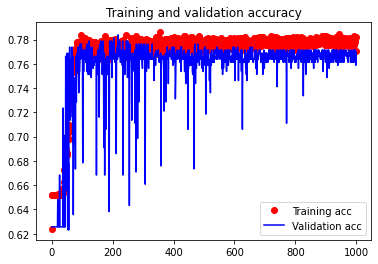

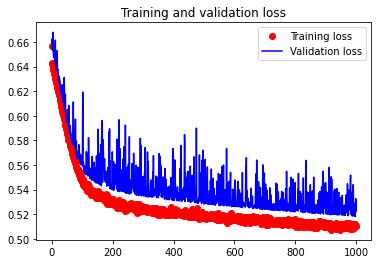

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
model_1.evaluate(X_train, y_train, return_dict=True)

38/38 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7777


{'loss': 0.507840096950531, 'accuracy': 0.7776845693588257}

In [28]:
model_1.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7688


{'loss': 0.5225900411605835, 'accuracy': 0.7688442468643188}

## Model two

[Adam optimiser](https://arxiv.org/abs/1412.6980)

[Binary Cross entropy](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/)

In [80]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 256)               3328      
                                                                 
 dense_13 (Dense)            (None, 2)                 514       
                                                                 
Total params: 3,842
Trainable params: 3,842
Non-trainable params: 0
_________________________________________________________________


In [81]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
history = model_2.fit(X_train,y_train, validation_data=(X_valid, y_valid), epochs=1000)

Epoch 1/1000
38/38 [==============================] - 1s 6ms/step - loss: 0.6386 - accuracy: 0.6518 - val_loss: 0.6400 - val_accuracy: 0.6256
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.6535 - val_loss: 0.6107 - val_accuracy: 0.7337
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.7139 - val_loss: 0.5814 - val_accuracy: 0.7161
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7777 - val_loss: 0.5616 - val_accuracy: 0.7714
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7735 - val_loss: 0.5454 - val_accuracy: 0.7663
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7643 - val_loss: 0.5568 - val_accuracy: 0.7663
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7752 - val_loss: 0.5435 - val_accuracy: 0.7638
Epoch 

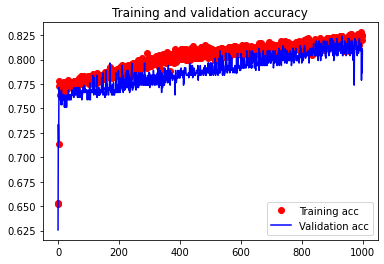

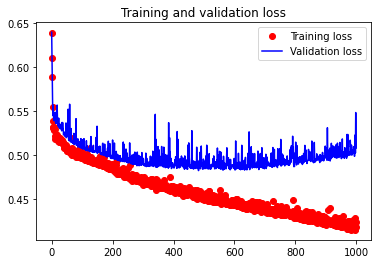

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [84]:
model_2.evaluate(X_train, y_train, return_dict=True)


38/38 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8247


{'loss': 0.414171427488327, 'accuracy': 0.8246644139289856}

In [85]:
model_2.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8090


{'loss': 0.5084015130996704, 'accuracy': 0.8090452551841736}

## Model Three

[SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

[Binary Cross entropy](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/)

In [40]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12)                0         
                                                                 
 dense_9 (Dense)             (None, 512)               6656      
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 270,338
Trainable params: 270,338
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.compile(optimizer='SGD', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model_3.fit(X_train,y_train, validation_data=(X_valid, y_valid), epochs=1000)

Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 0.6487 - accuracy: 0.6518 - val_loss: 0.6615 - val_accuracy: 0.6256
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6518 - val_loss: 0.6691 - val_accuracy: 0.6256
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6518 - val_loss: 0.6608 - val_accuracy: 0.6256
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6518 - val_loss: 0.6807 - val_accuracy: 0.6256
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6518 - val_loss: 0.6691 - val_accuracy: 0.6256
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6518 - val_loss: 0.6599 - val_accuracy: 0.6256
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6518 - val_loss: 0.6651 - val_accuracy: 0.6256
Epoch

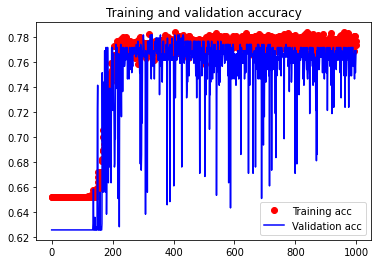

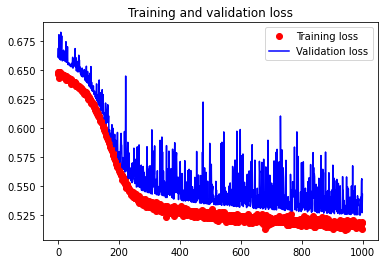

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
model_3.evaluate(X_train, y_train, return_dict=True)

38/38 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7794


{'loss': 0.5211468935012817, 'accuracy': 0.7793624401092529}

In [39]:
model_3.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7714


{'loss': 0.5239536166191101, 'accuracy': 0.7713567614555359}

# Evaluate and apply to test dataset

[Loss](https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/)

[Accuracy and other metrics](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)

[Confusion matrices](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

In [86]:
model_1.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7688


{'loss': 0.5225900411605835, 'accuracy': 0.7688442468643188}

In [87]:
model_2.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8090


{'loss': 0.5084015130996704, 'accuracy': 0.8090452551841736}

In [88]:
model_3.evaluate(X_valid, y_valid, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7688


{'loss': 0.5425947308540344, 'accuracy': 0.7688442468643188}

In [92]:
test_predictions = np.round(model_2.predict(X_test),0)
errors = y_test != test_predictions
correct = y_test == test_predictions
print("Accuracy: ", np.sum(correct)/len(y_test))
confusion_matrix(y_test.values.argmax(axis = 1),test_predictions.argmax(axis = 1))

13/13 [==============================] - 0s 1ms/step
Accuracy:  TravelInsurance_0    0.808564
TravelInsurance_1    0.808564
dtype: float64


array([[240,  11],
       [ 65,  81]])